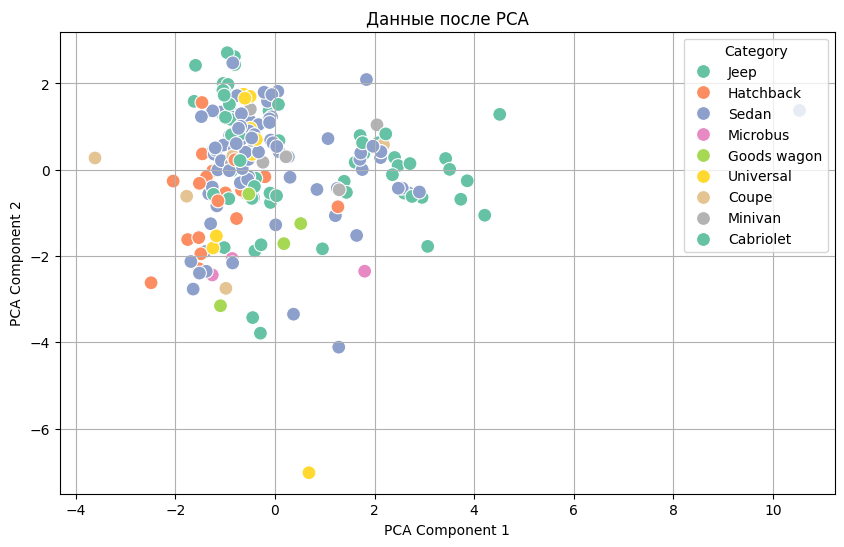

In [11]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Создание датафрейма
data = pd.read_csv("car_price_prediction.csv")

df = pd.DataFrame(data).head(200)

# Замена '-' на NaN и обработка числовых данных
df.replace("-", np.nan, inplace=True)
df["Levy"] = pd.to_numeric(df["Levy"], errors="coerce").fillna(0)
df["Mileage"] = pd.to_numeric(df["Mileage"], errors="coerce").fillna(0)

# Преобразование категориальных переменных в числовые
categorical_columns = [
    "Manufacturer",
    "Category",
    "Leather interior",
    "Fuel type",
    "Gear box type",
    "Drive wheels",
    "Wheel",
    "Color",
]
encoder = OneHotEncoder()
encoded_categorical = encoder.fit_transform(df[categorical_columns]).toarray()

# Нормализация числовых данных
numerical_columns = [
    "Price",
    "Levy",
    "Prod. year",
    "Engine volume",
    "Mileage",
    "Cylinders",
    "Airbags",
]
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(df[numerical_columns])

# Объединение данных
features = np.hstack([scaled_numerical, encoded_categorical])

# Снижение размерности с помощью PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features)

# Визуализация результатов PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=pca_result[:, 0], y=pca_result[:, 1], hue=df["Category"], palette="Set2", s=100
)
plt.title("Данные после PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Category", loc="upper right")
plt.grid(True)
plt.show()

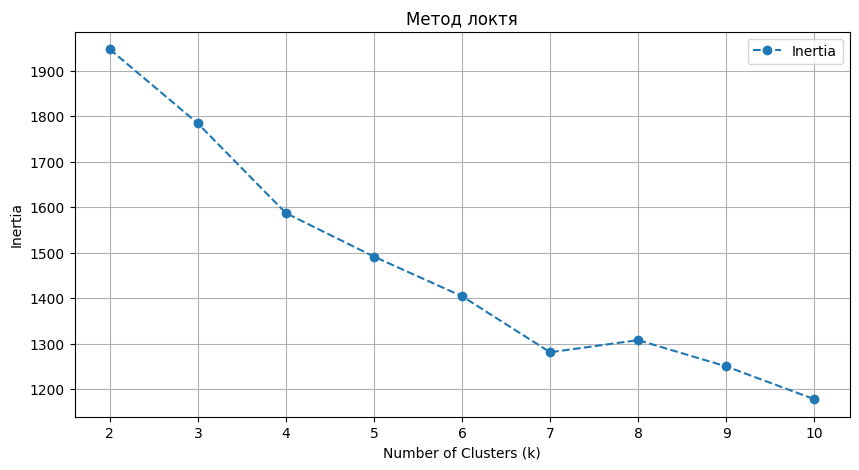

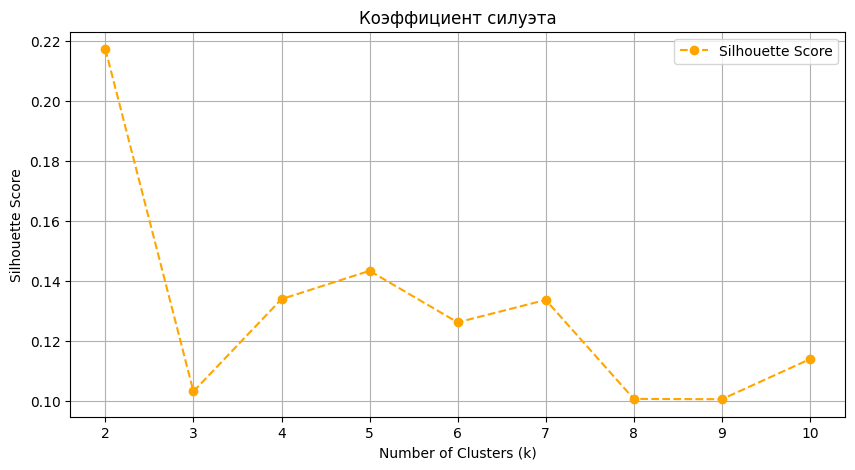

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Диапазон количества кластеров для проверки
cluster_range = range(2, 11)
inertia = []
silhouette_scores = []

# Вычисление инерции и коэффициента силуэта для каждого количества кластеров
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(features)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(features, labels))

# Визуализация метрики инерции (Elbow Method)
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, inertia, marker="o", linestyle="--", label="Inertia")
plt.title("Метод локтя")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(cluster_range)
plt.grid(True)
plt.legend()
plt.show()

# Визуализация коэффициента силуэта
plt.figure(figsize=(10, 5))
plt.plot(
    cluster_range,
    silhouette_scores,
    marker="o",
    linestyle="--",
    color="orange",
    label="Silhouette Score",
)
plt.title("Коэффициент силуэта")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.xticks(cluster_range)
plt.grid(True)
plt.legend()
plt.show()

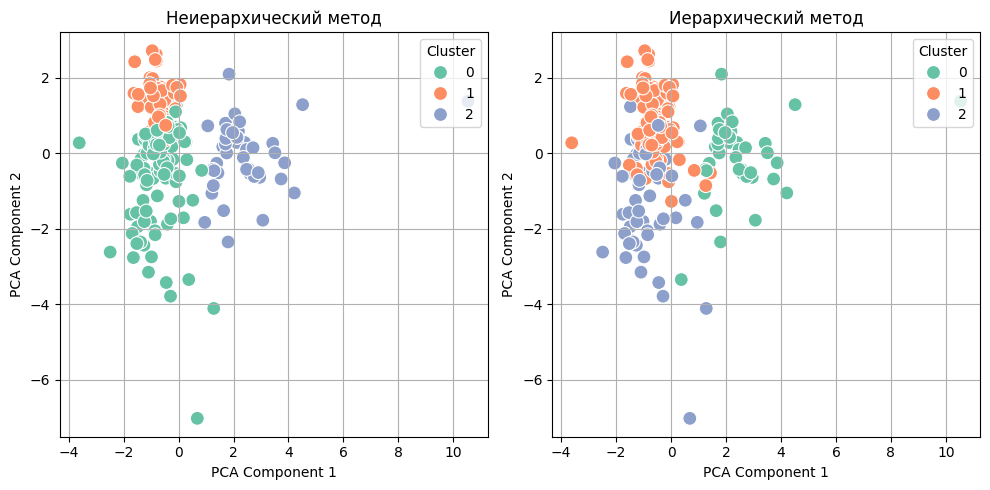

In [9]:
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

# Выбор оптимального количества кластеров (например, k=3, исходя из анализа)
optimal_k = 3

# 1. Неиерархический метод: K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(features)

# 2. Иерархический метод: Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=optimal_k)
agglo_labels = agglo.fit_predict(features)

# Визуализация результатов K-Means
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(
    x=pca_result[:, 0], y=pca_result[:, 1], hue=kmeans_labels, palette="Set2", s=100
)
plt.title("Неиерархический метод")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster", loc="upper right")
plt.grid(True)

# Визуализация результатов Agglomerative Clustering
plt.subplot(1, 2, 2)
sns.scatterplot(
    x=pca_result[:, 0], y=pca_result[:, 1], hue=agglo_labels, palette="Set2", s=100
)
plt.title("Иерархический метод")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster", loc="upper right")
plt.grid(True)

plt.tight_layout()
plt.show()